# Assignment 2.8 - Prediction of Health Costs for Insurance Industry

Let's move on to the exercise project on Health Insurance Cost Prediction

We are going to analyze the charges incurred by different patients and use the data to predict the possible charges for a future patient. Our key features are

* **age:** <br>age of primary beneficiary
* **sex:** <br>insurance contractor gender -- female / male
* **bmi:** <br>Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight $(kg/m^2)$ using the ratio of height to weight, ideally 18.5 to 24.9
* **children:** <br>Number of children covered by health insurance / Number of dependents
* **smoker:** <br>Smoking -- yes / no
* **region:** <br>the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* **charges:** <br>Medical costs billed by health insurance

**`'charges'`** column is the **Dependent Variable or target column** because we want our algorithm to predict this cost based on all other features in the list.

**`The 6 features from age to region'`** are your **Features or Independent Variables** which will help you predict charges. Vary any one of them and it is going to affect your charges. Agreed?


## Basic Intuition 

In this section lets try to have a basic intuition behind what a Machine Learning Algorithm does to solve a Regression problem.

Now lets say you have to predict the Medical cost billed by insurance company based on customers age, sex, bmi and other data. There is no straight forward mathematical formula for that. This is where Machine learning comes to our aid.
<br><br>
The Machine learning model mostly tries to predict this function which best describes the data / best fits the data. 
<br> f(X) = (a x feature1) + (b x feature2) + (c x feature3) + ...
<br> ie, if you have the optimal values of a, b, c (called parameters of the model) you can predict your dependent variable close to actual value.
<br> But how to know if our function is the best function that describes our dataset. This brings us to a very impaortant stage in our pipeline which is Data Preprocessing.

# Solution - Use it only after you have given your best to do it on your own !!

In [1]:
# Load the dataset into pandas dataframe and print the sample of first 5 rows

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/diksha-cl/machine_leearning_cl/master/insurance_data.csv')
df.head()

,age,bmi,children,smoker,obese,sex,charges
0,19,27.900,0,1,0,0,16884.92400
1,18,33.770,1,0,1,1,1725.55230
2,28,33.000,3,0,1,1,4449.46200
3,33,22.705,0,0,0,1,21984.47061
4,32,28.880,0,0,0,1,3866.85520


In [2]:
# Check for nulls.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null int64
obese       1338 non-null int64
sex         1338 non-null int64
charges     1338 non-null float64
dtypes: float64(2), int64(5)
memory usage: 73.2 KB


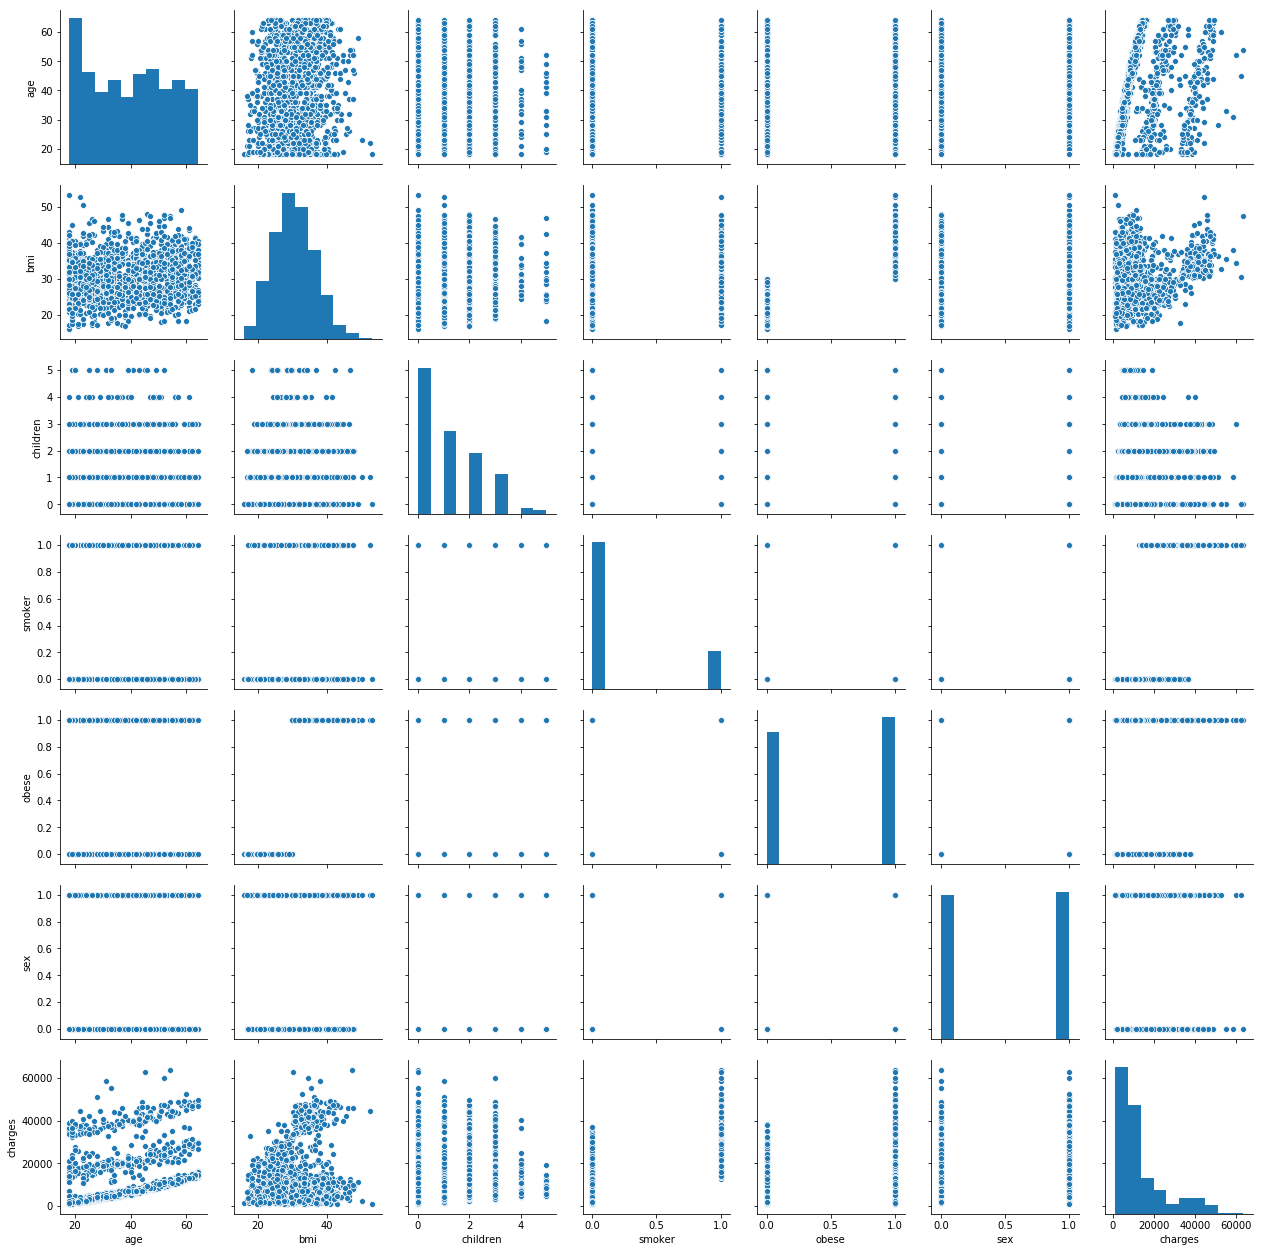

In [3]:
# Check for correlations between the features and the target.

import seaborn as sns
%matplotlib inline

sns.pairplot(df[['age', 'bmi', 'children', 'smoker', 'obese', 'sex', 'charges']]) 

In [4]:
# Create the pandas dataframe with the features and the pandas series with the target.

X = df.iloc[:,:6]
y = df.iloc[:,6]

In [5]:
from sklearn import linear_model

# Let's create an instance for the LinerRegression model
lr = linear_model.LinearRegression()

# Train the model on our train dataset
lr.fit(X, y)

# Print the coefficients of the trained model.
coeffs = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
coeffs

,Coefficient
age,257.795444
bmi,125.493807
children,473.142002
smoker,23841.932222
obese,3007.932754
sex,-151.591317


In [6]:
# Getting predictions from the model for the given examples.
predictions = lr.predict(X)

# Compare with the actual charges.
Scores = pd.DataFrame({'Actual': y})
column = pd.DataFrame({'Predictions': predictions})
Scores = Scores.join(column.set_index(Scores.index))
Scores.head()

,Actual,Predictions
0,16884.92400,24647.497468
1,1725.55230,4613.901889
2,4449.46200,8041.510104
3,21984.47061,3611.169823
4,3866.85520,4128.298637


In [7]:
# Lets evaluate the model for its accuracy using various metrics such as RMSE, 
# and especially R-squared.
from sklearn import metrics
import numpy as np

print('MAE:', metrics.mean_absolute_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
print('Average Cost:', y.mean())
print('R-squared' , metrics.r2_score(y, predictions))

MAE: 4235.185106710822
RMSE: 5988.526691650194
Average Cost: 13270.422265141257
R-squared 0.7552765462621057


In [ ]:
Scores = pd.DataFrame({'Actual': y})
column = pd.DataFrame({'Predictions': predictions})
Scores = Scores.join(column.set_index(Scores.index))
Scores.head()